# Data Preprocessing

Описание дынных. 
- Исходный датасет имеет 10 переменных.
- 9 первых переменных - это независимые. 
- Последняя переменная "Category" - зависимая переменная. 
- Переменная "Category" состоит из двух типов: 0 и 1, где 0 - это здоровые люди, 1 - заболевшие. 
- Конвертируем наш документ, осуществим подготовку данных, импортируем необходимые библиотеки.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('КР2.csv', sep=',')

Имеем 10 столбцов, 615 строк.

In [3]:
df

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHOL,CREA,Category
0,32,m,38.5,52.5,7.7,22.1,7.5,3.23,106.0,0
1,32,m,38.5,70.3,18.0,24.7,3.9,4.80,74.0,0
2,32,m,46.9,74.7,36.2,52.6,6.1,5.20,86.0,0
3,32,m,43.2,52.0,30.6,22.6,18.9,4.74,80.0,0
4,32,m,39.2,74.1,32.6,24.8,9.6,4.32,76.0,0
...,...,...,...,...,...,...,...,...,...,...
610,62,f,32.0,416.6,5.9,110.3,50.0,6.30,55.7,1
611,64,f,24.0,102.8,2.9,44.4,20.0,3.02,63.0,1
612,64,f,29.0,87.3,3.5,99.0,48.0,3.63,66.7,1
613,46,f,33.0,NaN,39.0,62.0,20.0,4.20,52.0,1


Построим графики распределения функций

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


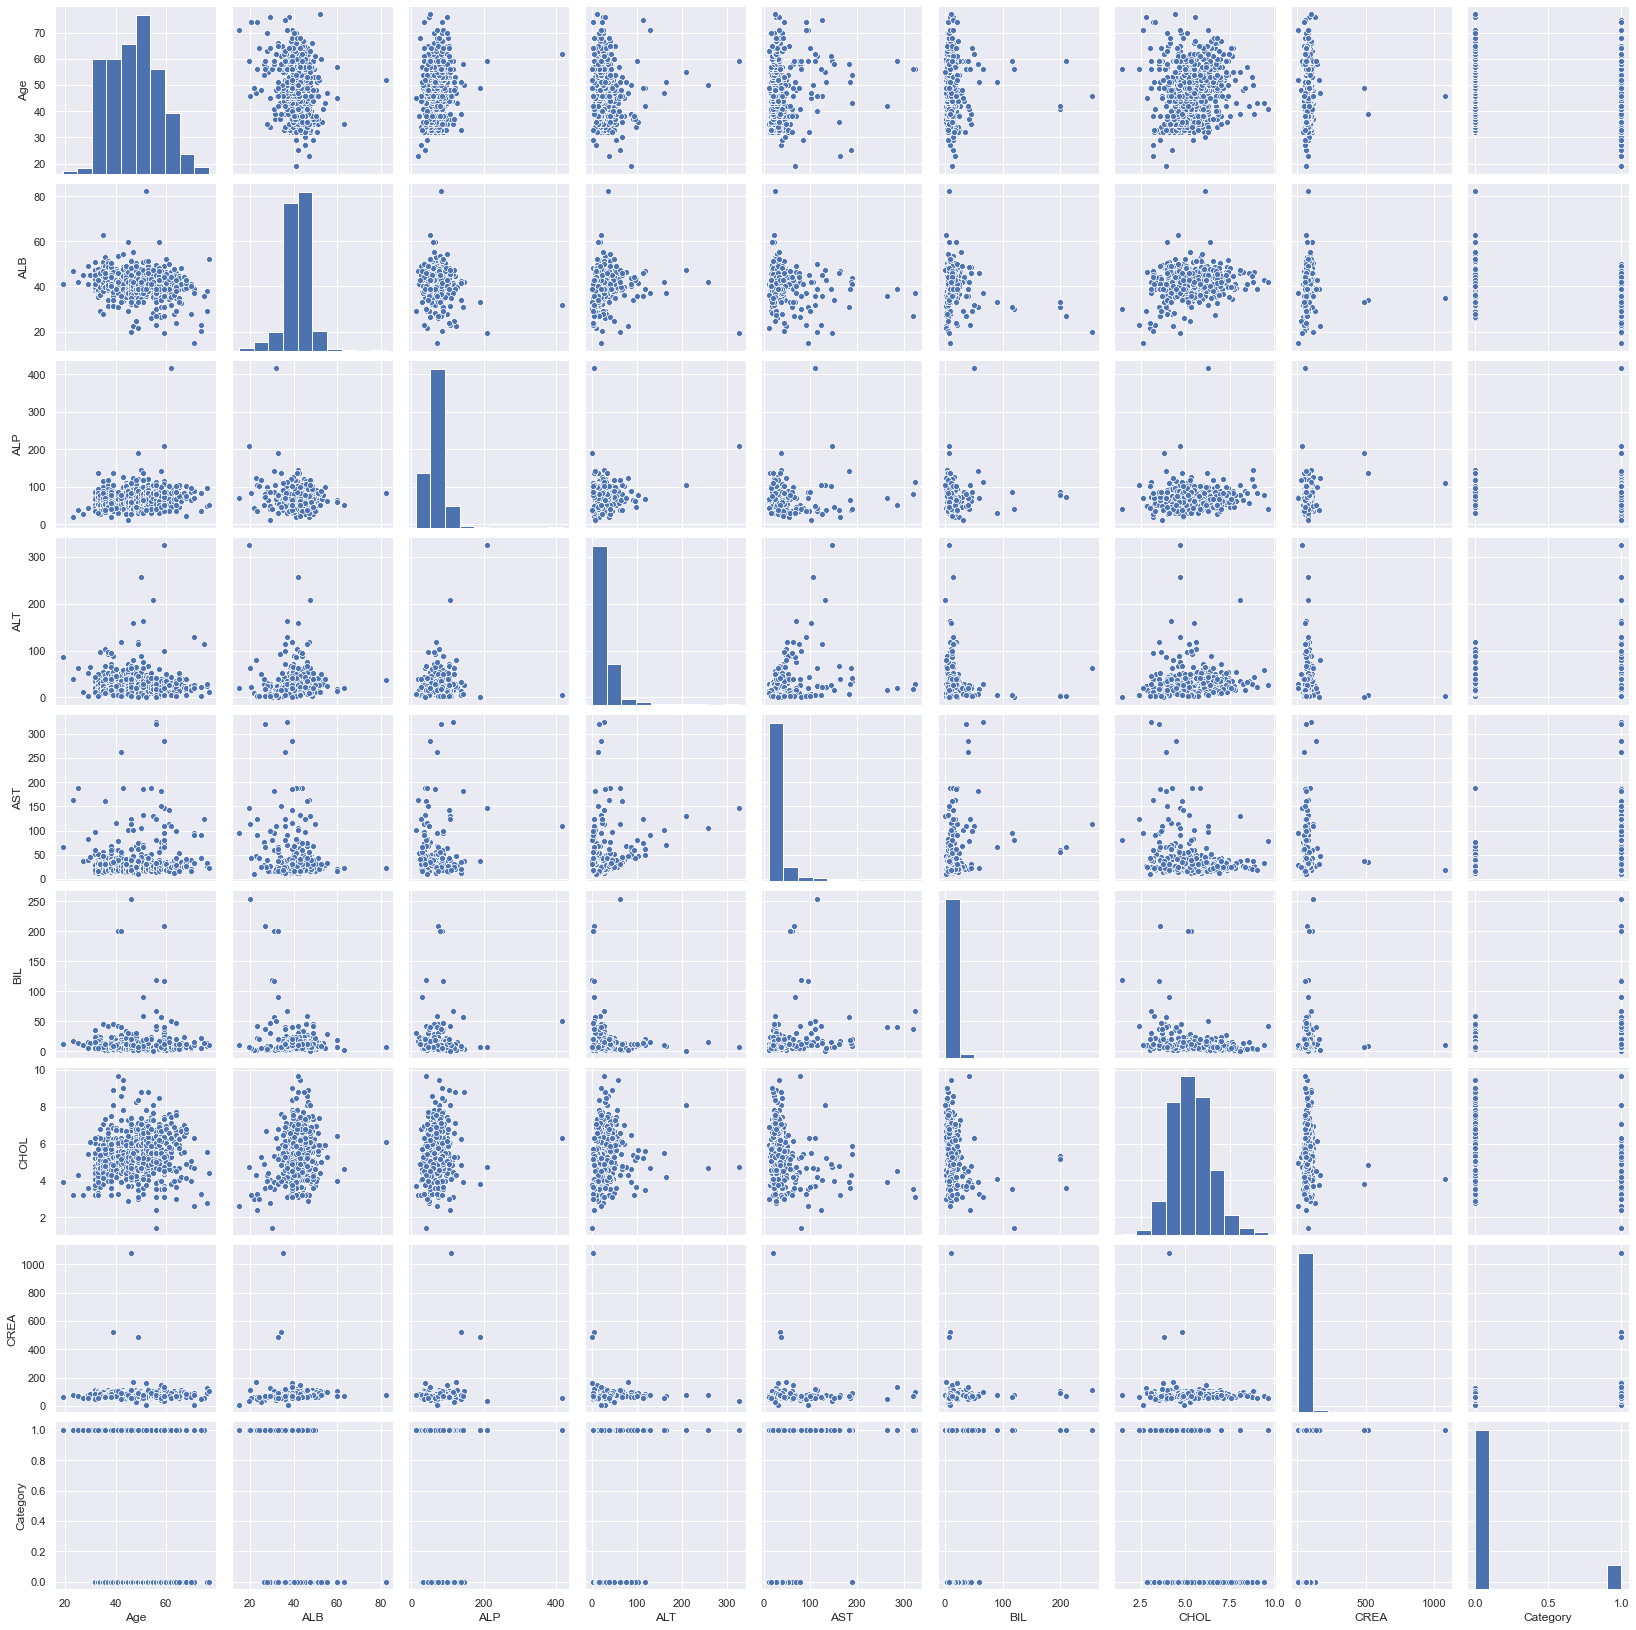

In [4]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

- Следующим этапом подготовки данных будет проверка и заполнение пропущенных значений.
- Выведем общее количество и процент пропусков по переменным.
- 4 переменных имеют пропущенные значения.

In [5]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
ALP,18,0.029268
CHOL,10,0.016260
ALT,1,0.001626
ALB,1,0.001626
Category,0,0.000000
CREA,0,0.000000
BIL,0,0.000000
AST,0,0.000000
Sex,0,0.000000
Age,0,0.000000


- для числовых переменных заполняем пропуски средними значениями.

In [6]:
# Function Missing data (numeric)
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

Записываем в наш датафрейм уже очищенные данные.

In [7]:
# Filling NA 
from sklearn.impute import SimpleImputer
df = fill_missing_num(df)

Заново выведем общее количество и процент пропусков

In [8]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Category,0,0.0
CREA,0,0.0
CHOL,0,0.0
BIL,0,0.0
AST,0,0.0
ALT,0,0.0
ALP,0,0.0
ALB,0,0.0
Sex,0,0.0
Age,0,0.0


Выведем статистику по числовым значениям. Как и следовало ожидать - пропущенных значений нет. 

In [9]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHOL,CREA,Category
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,5.368099,81.287805,0.133333
std,10.055105,5.775920,25.643955,25.448940,33.090690,19.673150,1.123466,49.756166,0.340211
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.430000,8.000000,0.000000
25%,39.000000,38.800000,52.950000,16.400000,21.600000,5.300000,4.620000,67.000000,0.000000
50%,47.000000,41.900000,66.700000,23.000000,25.900000,7.300000,5.310000,77.000000,0.000000
75%,54.000000,45.200000,79.300000,33.050000,32.900000,11.200000,6.055000,88.000000,0.000000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,9.670000,1079.100000,1.000000


В нашем датасете присутствуют качественные переменные - пол. Ее необходимо закодировать с помощью функции.
Запишем список нечисловых переменных и проведем кодирование качественных переменных. Результат запишем обратно в базу.

In [10]:
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [11]:
df = encoding_char(df)

Прологарифмируем некоторые столбцы данных

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


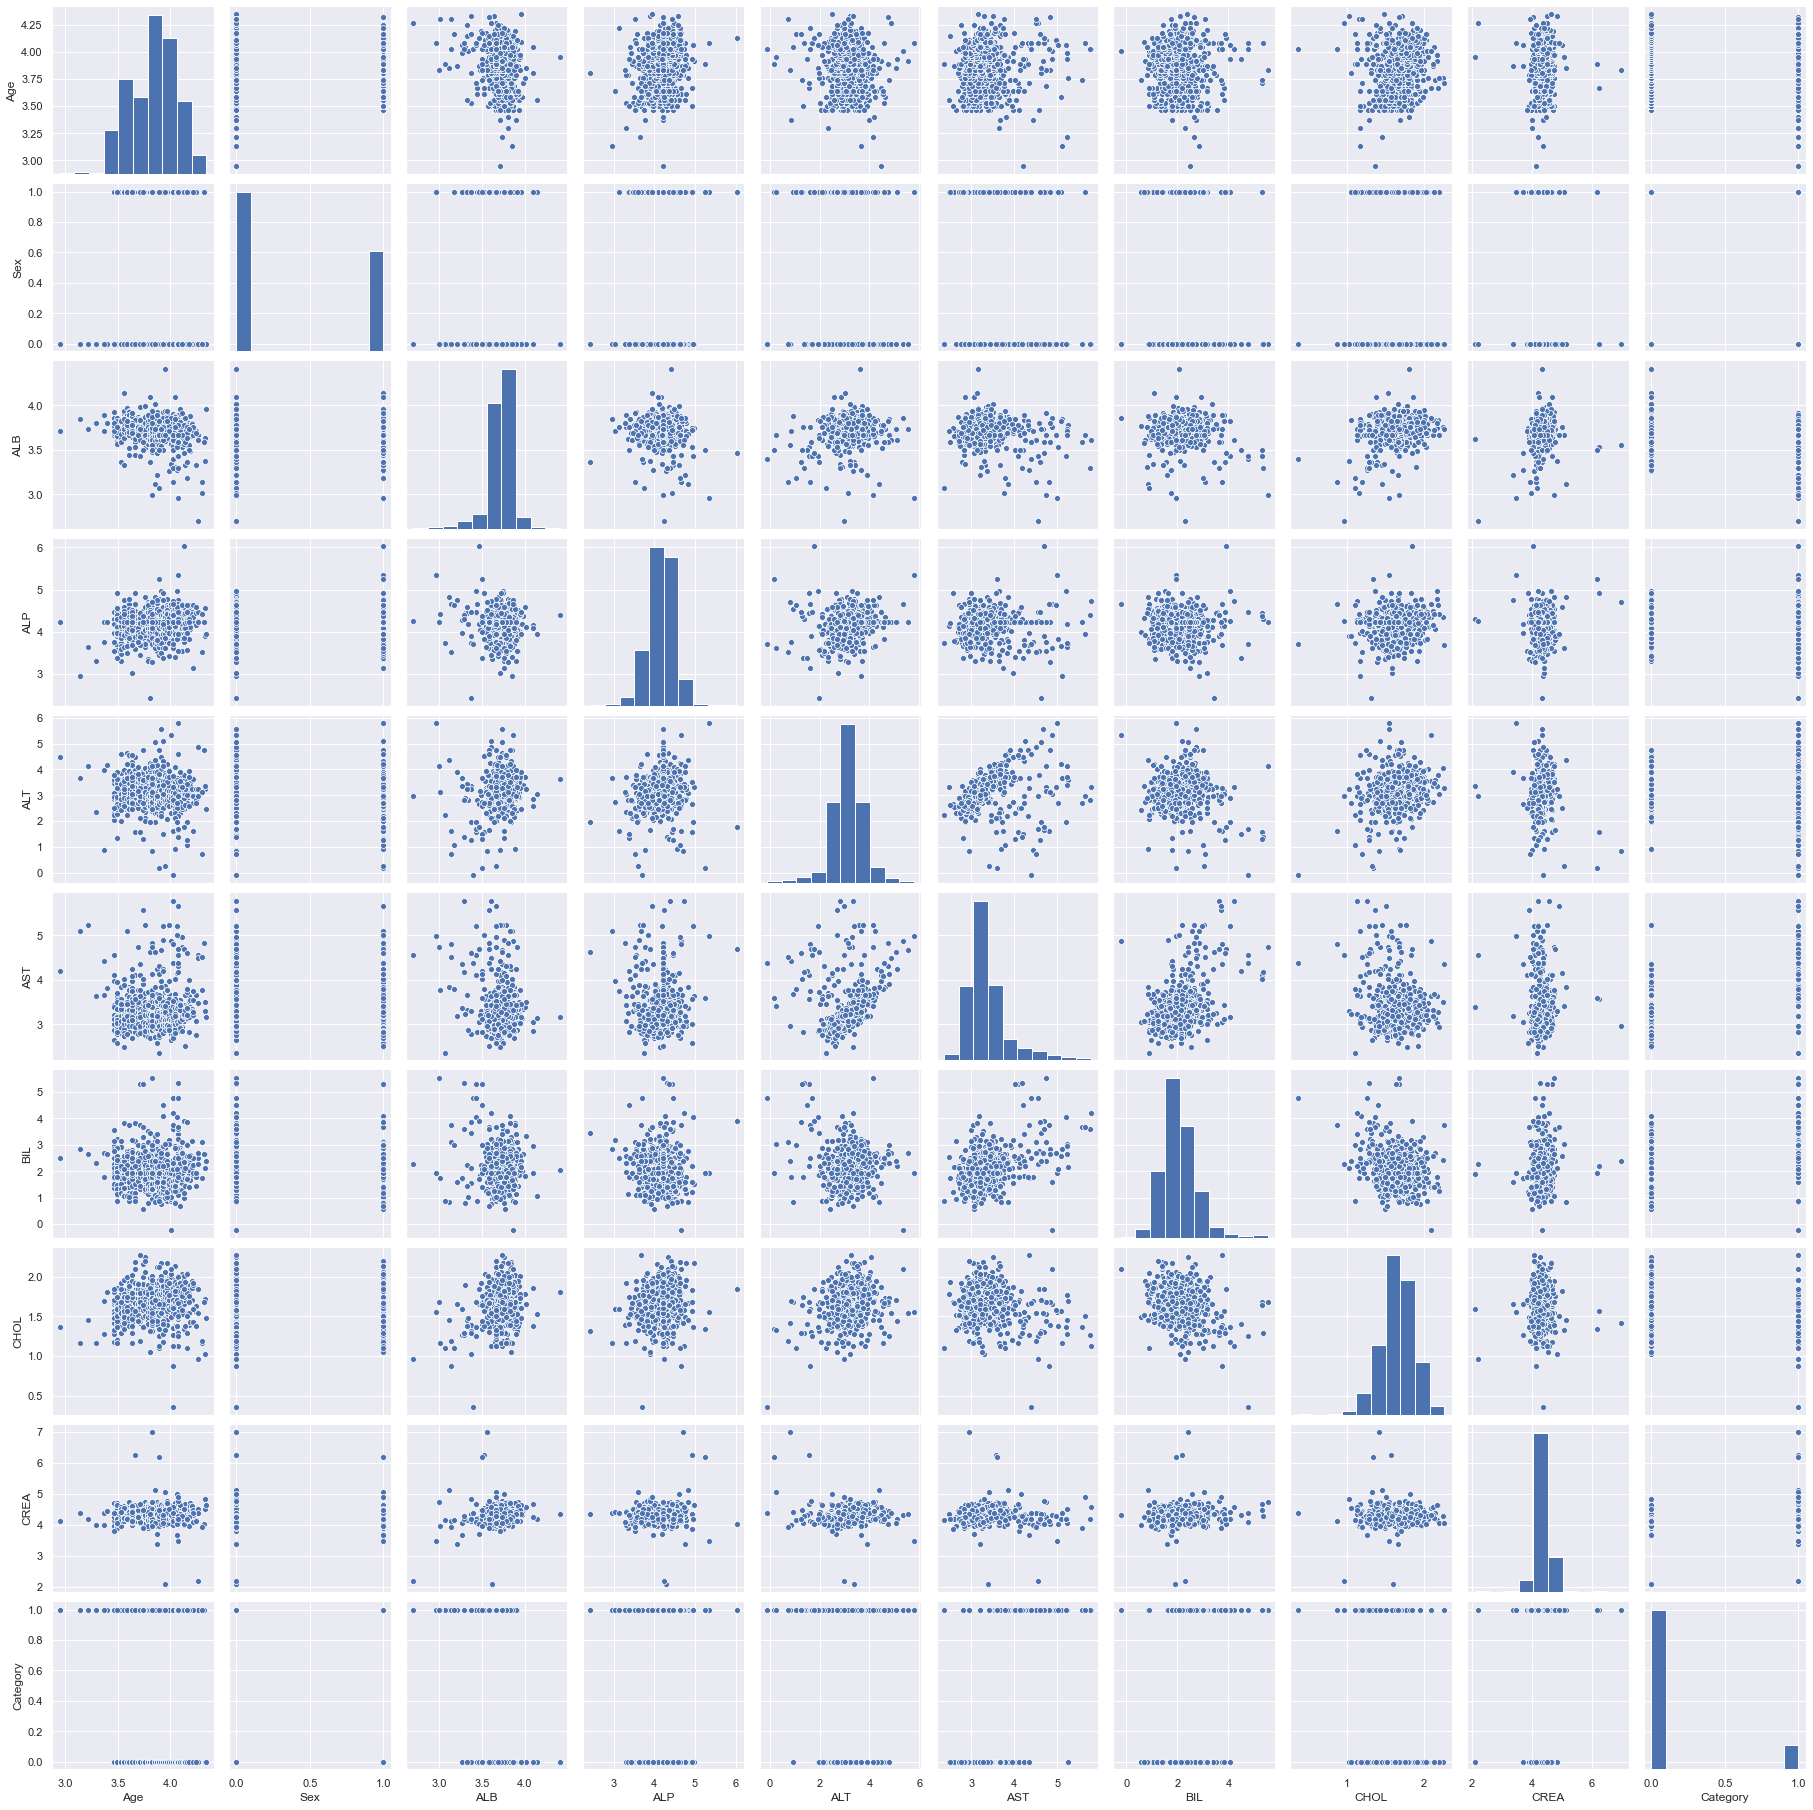

In [12]:
df_1 = df.copy()
df_1[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHOL', 'CREA']] = np.log(df_1[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHOL', 'CREA']])
sns.set()
sns.pairplot(df_1, size = 2.5)
plt.show();

- Осуществим работы с выбросами в числовых переменных
- применим функцию для поиска и замены данных, выходящих за пределы 3 сигма. 

In [13]:
def outliers(df_1):
    num_var = list(df_1._get_numeric_data().columns)
    for col_names in num_var:
        df_1[col_names] = df_1[col_names].apply(lambda y: df_1[col_names].mean()-3*df_1[col_names].std() 
                            if y < df_1[col_names].mean()-3*df_1[col_names].std() else y)
        df_1[col_names] = df_1[col_names].apply(lambda y: df_1[col_names].mean()+3*df_1[col_names].std() 
                            if y > df_1[col_names].mean()+3*df_1[col_names].std() else y)
    return(df_1)

- Запишем в наш датасет уже очищенные от  выбросов переменные и выведем статистику повторно
- В результате выполнения очистки наблюдаем, что максимальное, минимальное, среднее значения и стандартное отклонение изменились по всем числовым переменным, кроме "Age" и соответствуют нормальному распределению. 
- Это говорит об отсутствии выбросов.

In [14]:
df_1 = outliers(df_1)
df_1.describe()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHOL,CREA,Category
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,3.836370,0.386992,3.720908,4.168570,3.132560,3.358715,2.069715,1.659285,4.344526,0.133333
std,0.214484,0.487458,0.135196,0.315794,0.623910,0.469201,0.654842,0.210478,0.211181,0.340211
min,3.187398,0.000000,3.263190,3.174941,1.147992,2.360854,-0.009186,1.008992,3.505147,0.000000
25%,3.663562,0.000000,3.658420,3.969348,2.797281,3.072693,1.667707,1.530395,4.204693,0.000000
50%,3.850148,0.000000,3.735286,4.200205,3.135494,3.254243,1.987874,1.669592,4.343805,0.000000
75%,3.988984,1.000000,3.811097,4.373238,3.498020,3.493473,2.415914,1.800884,4.477337,0.000000
max,4.343805,1.000000,4.132553,5.142087,5.035315,4.880274,4.165803,2.269028,5.113206,1.000000


Отшкалируем данные, используя MinMaxScaler, переведя наши данные в диапазон от 0 до 1 с округлением.  Используем мин-макс шкалирование т.к. он не внесет никаких дополнительных изменений. Вывыдем результат в таблицу, подписав соответственно названия столбцов.

In [15]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df_1)
df_1 = sc.transform(df_1)
pd.DataFrame(df_1, columns = ['Age','Sex','ALB','ALP','ALT','AST','BIL','CHOL','CREA','Category']).round()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHOL,CREA,Category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
610,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
611,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
612,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
613,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0


Посмотрим  на метод локтя для алгоритмя к-средних. Это нужно для того, чтобы видеть, сколько кластеров имеет смысл выделить. Прогоним наш алгоритм в цикле от 1 до 11 кластеров.  Посмотрим как будет изменяться функция расстояния от ядра до объектов кластера и отобразим на графике.

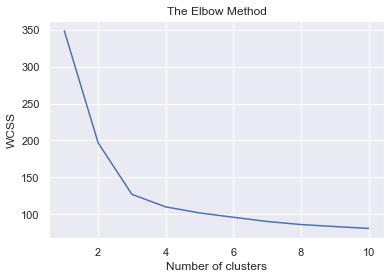

In [16]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df_1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Видим, что функция падает при 2х и 3х кластерах, потом на 4м скорость плавно падает. 

Еще один метод для определения оптиального числа кластеров - метод силуэта. Применим для рассчета кластеров от 2х до 7ми. 

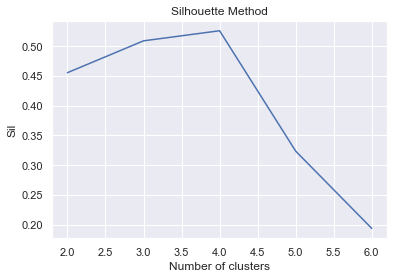

2:0.4555087717898269
3:0.5090583253035087
4:0.5260402191841302
5:0.32362675197815227
6:0.19369089592409014


In [17]:
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 7):
  kmeans = KMeans(n_clusters = k).fit(df_1)  
  preds = kmeans.fit_predict(df_1)
  sil.append(silhouette_score(df_1, preds, metric = 'euclidean'))


plt.plot(range(2, 7), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

- Видим, что максимкальное значение у нас достигается при 4х кластерах, т.к. его значение наибольшее. 
- Далее идет 3 кластера. Поэтому можно попытаться выделить 4 кластера на наших данных. 
- Применим метод к-средних с 4мя кластерами и выведем ядра в табличку. 

In [18]:
# Применяем алгоритм К-средник для наших данных.
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df_1)
kms = KMeans(n_clusters = 4, random_state = 0).fit(df_1)
pd.DataFrame(kms.cluster_centers_, columns = ['Age','Sex','ALB','ALP','ALT','AST','BIL','CHOL','CREA','Category']).round()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHOL,CREA,Category
0,1.0,-0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


Сократим количество переменных до 6ти, оставив наши значимые показатели. Sex,ALB,AST,BIL,Category, Остальные  Построим на четырех кластерах. Обучим на множестве и выведем ядра.

In [19]:
X = df_1[:, [1,2,5,6,9]]

In [20]:
# Применяем алгоритм К-средник для наших отобранных данных.
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 4, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Sex','ALB','AST','BIL','Category']).round()

,Sex,ALB,AST,BIL,Category
0,1.0,1.0,0.0,0.0,0.0
1,-0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,1.0
3,1.0,0.0,1.0,1.0,1.0


In [21]:
import pickle
obj = {'km': km}
output = open('clust-kr.pkl', 'wb')
pickle.dump(obj, output, 5)
output.close()

Прошкалируем наши данные

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(df_1)
df_1 = sc.transform(df_1)

Выбираем ранее отобранные нами значимые переменные 'Sex','ALB','AST','BIL','Category'.

In [22]:
X = df_1[:, [1,2,5,6,9]]

SOM

Для дальнейшей работы установим библиотеку SimpSOM. Построим базовую сетку. Для этого из импортированной библиотеки используем фукцию somNet и задаем ее параметры. Зададим размерность сетки равной 15х15, т.к. в нашей выборке 615 значений. Пускай обучение проводится с желаемой фиксацией потерь равно 1%. Количество итераций - 1500.

In [23]:
#pip install SimpSOM

Note: you may need to restart the kernel to use updated packages.


In [24]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(15, 15, X, PBC=True)
net.train(0.01, 1500)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


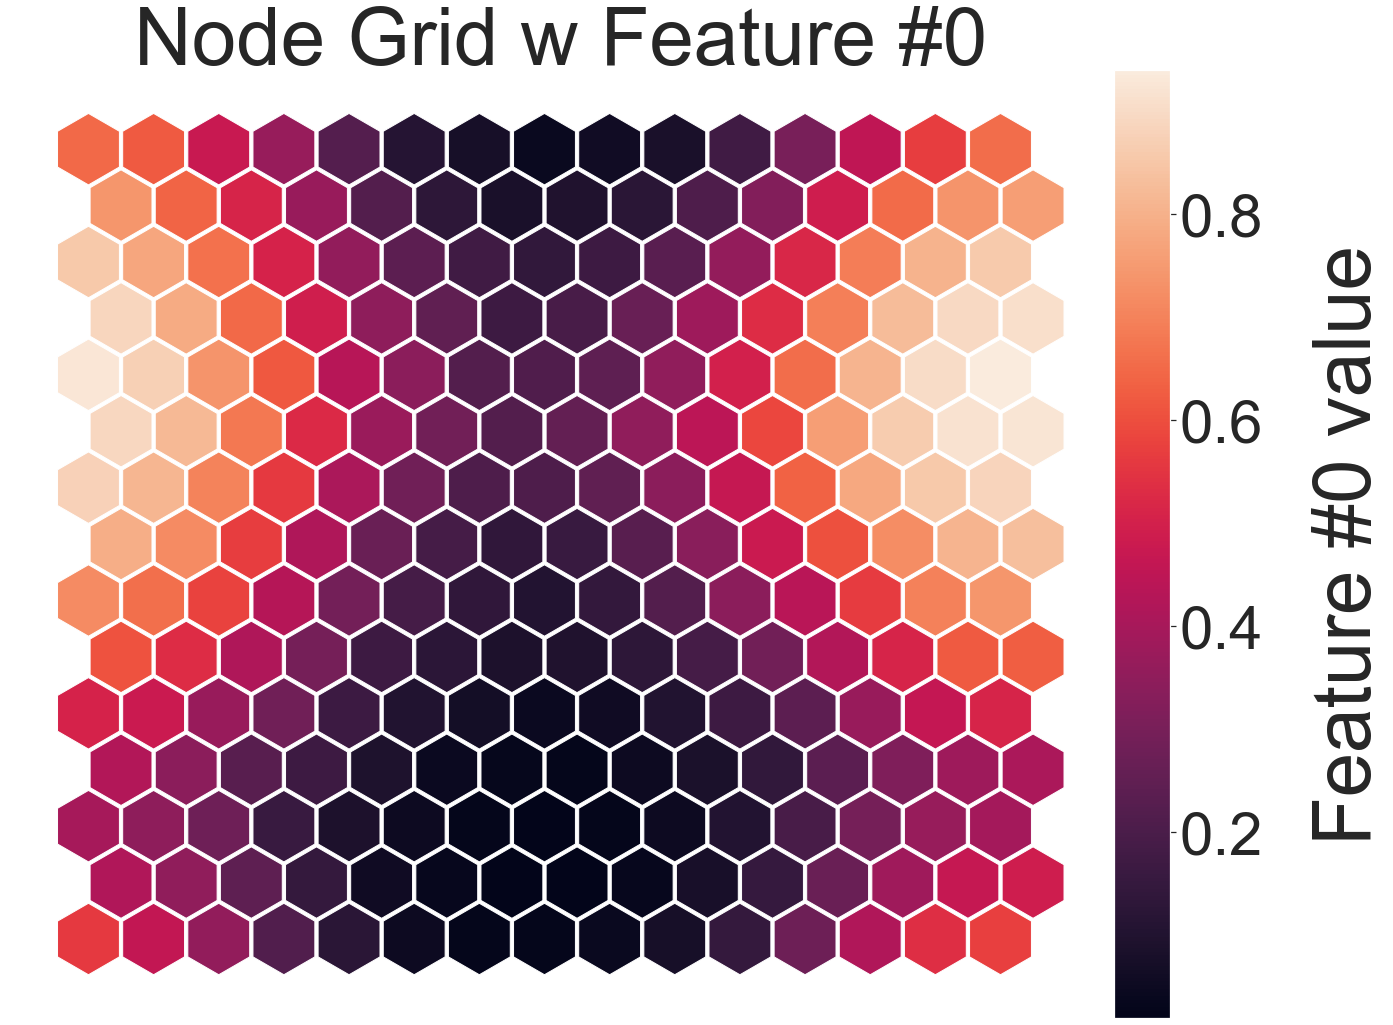

In [25]:
net.nodes_graph(colnum=0)

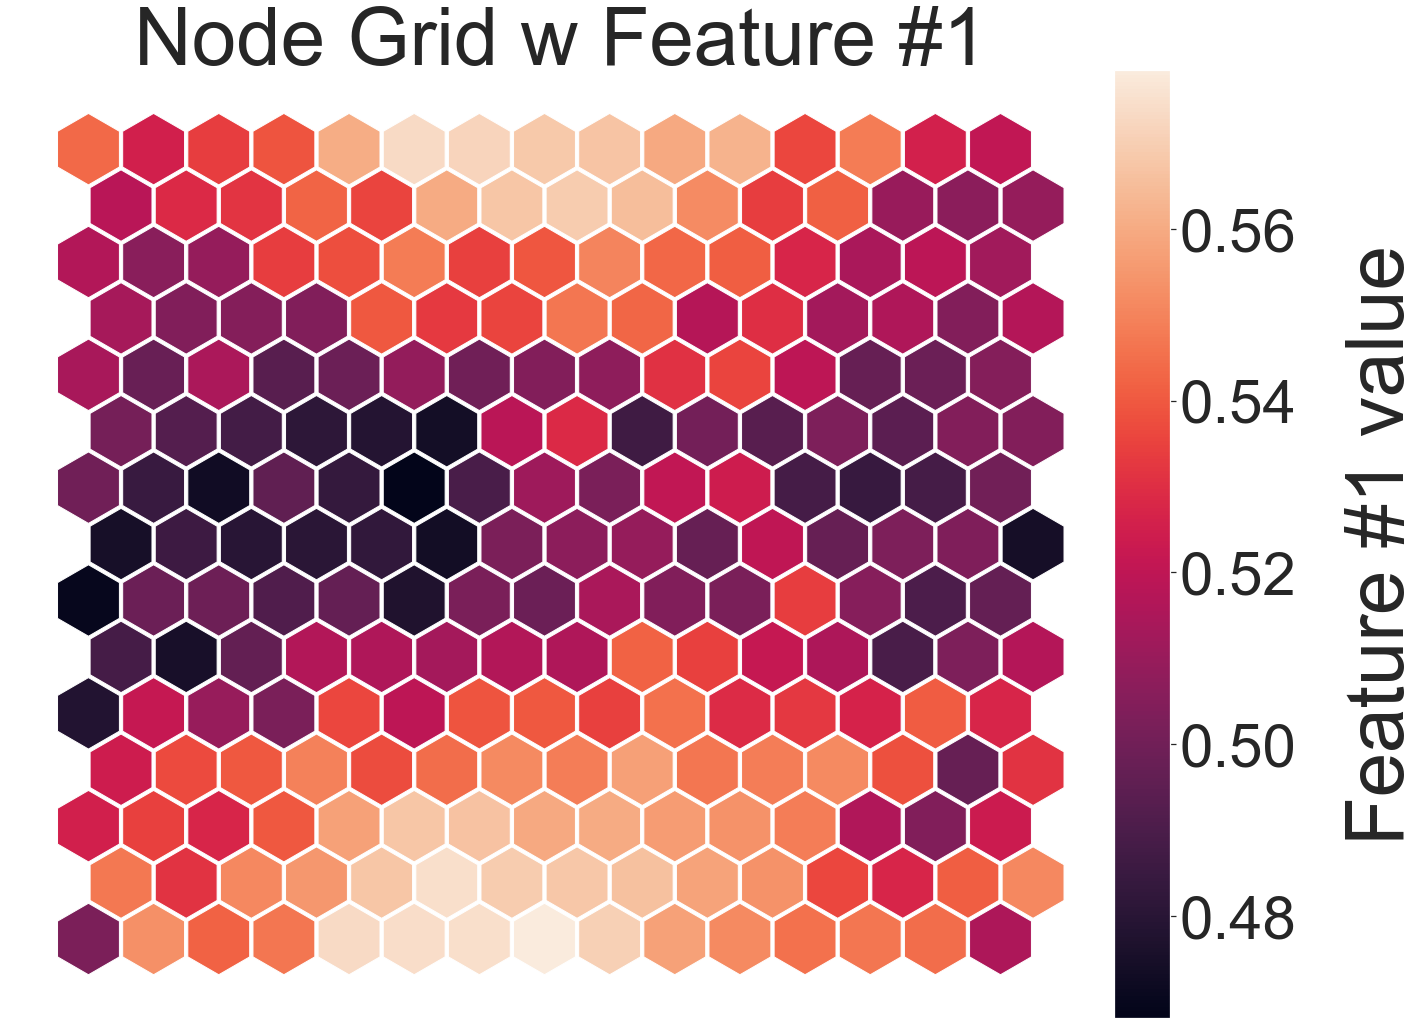

In [26]:
net.nodes_graph(colnum=1)

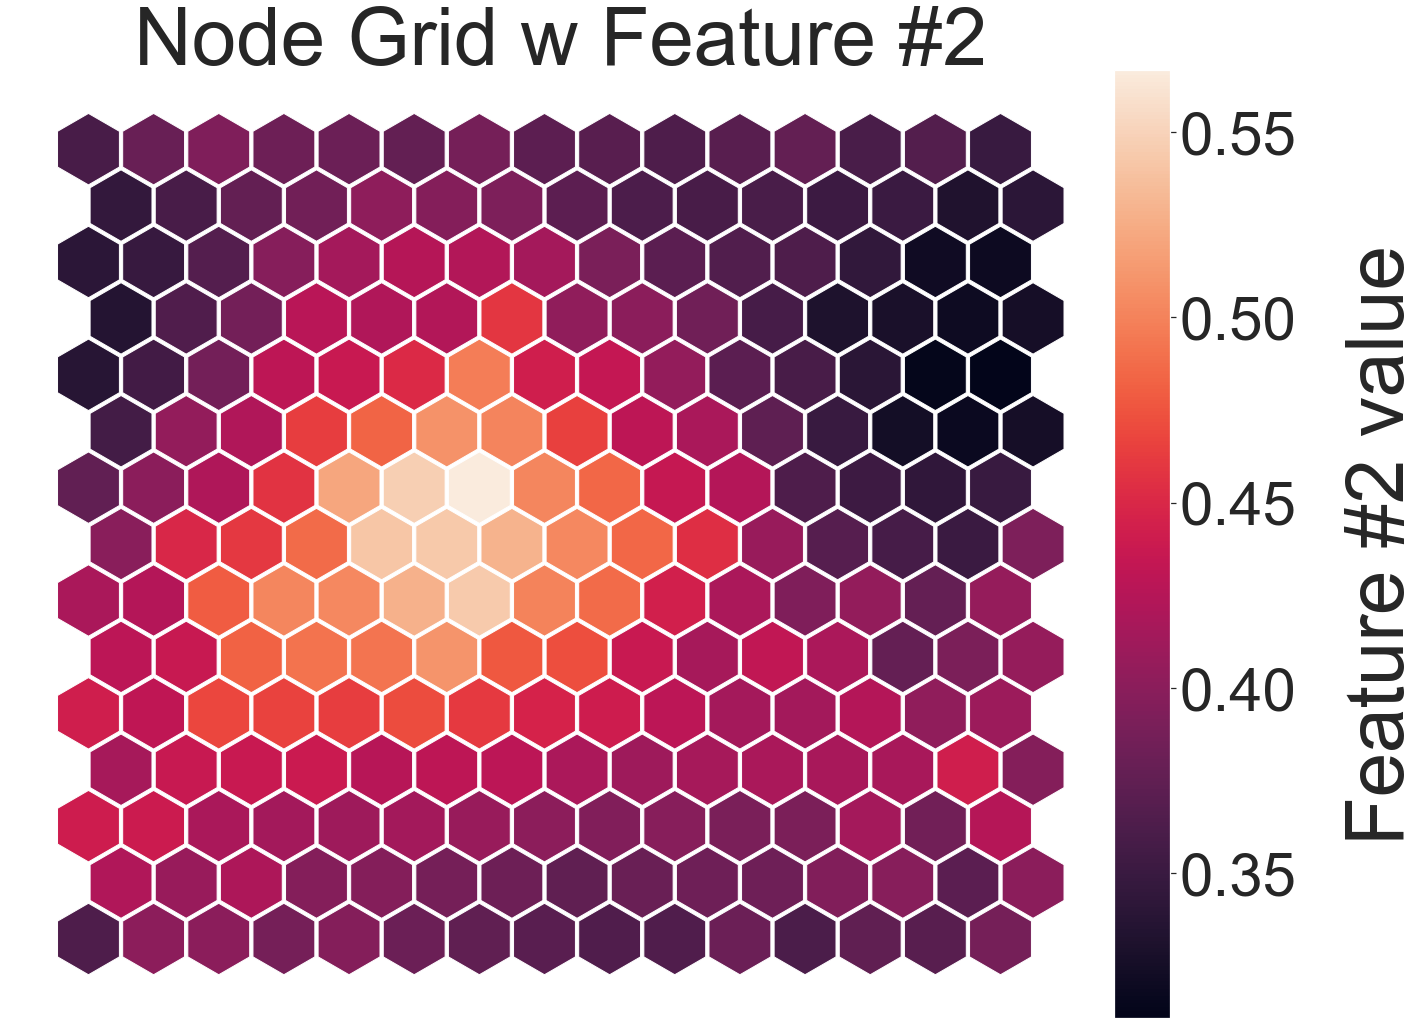

In [29]:
net.nodes_graph(colnum=2)

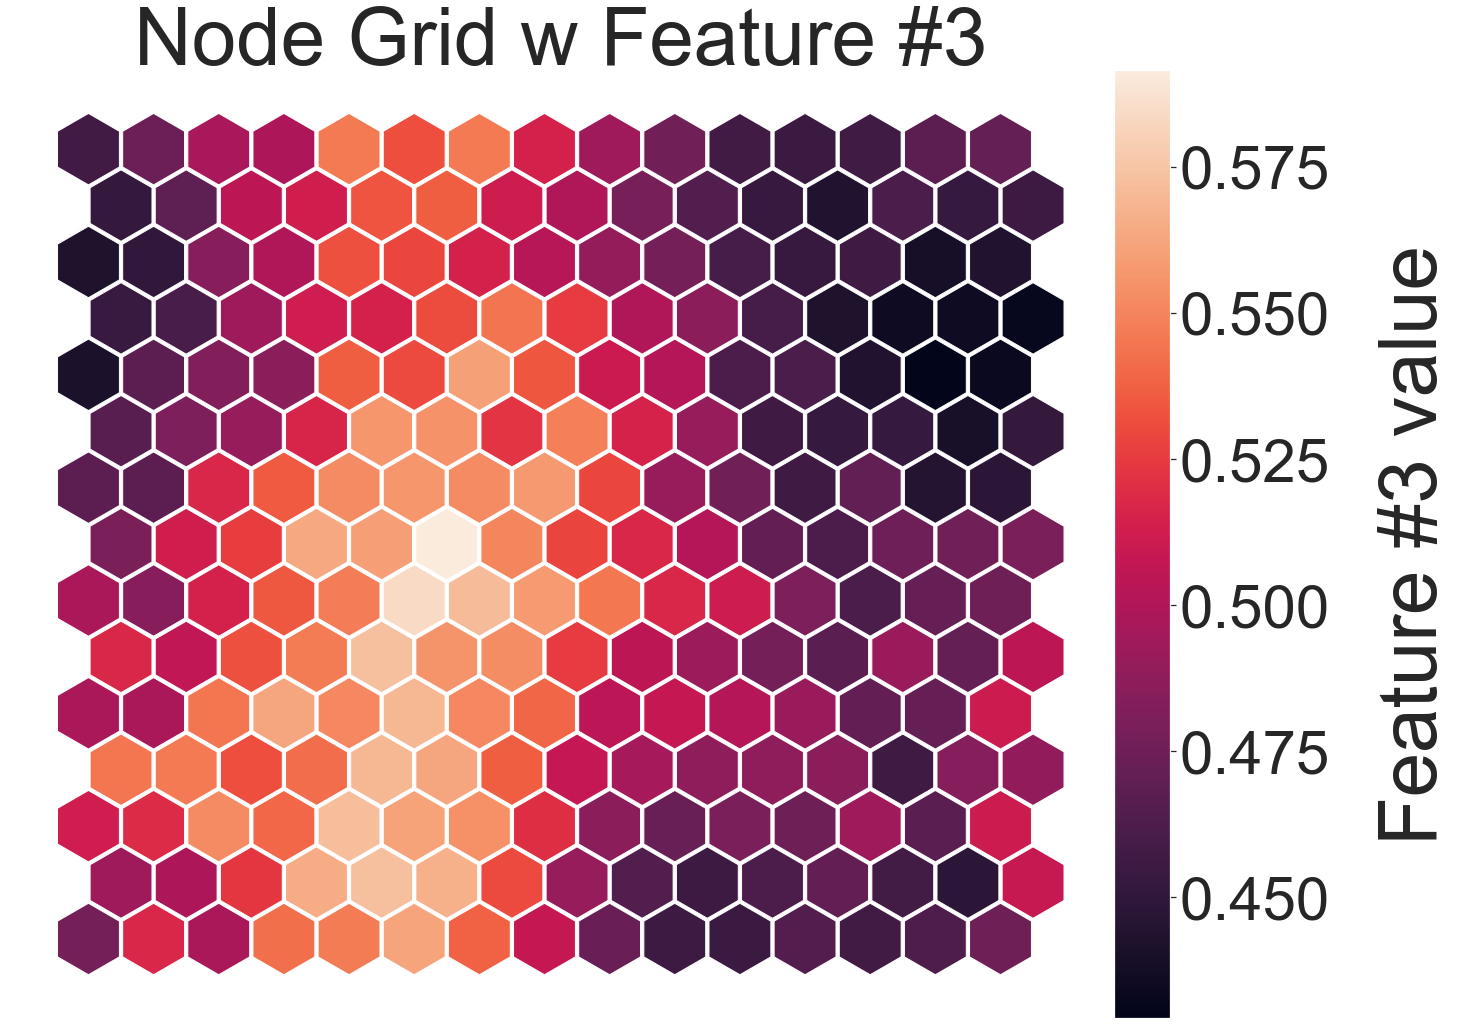

In [30]:
net.nodes_graph(colnum=3)

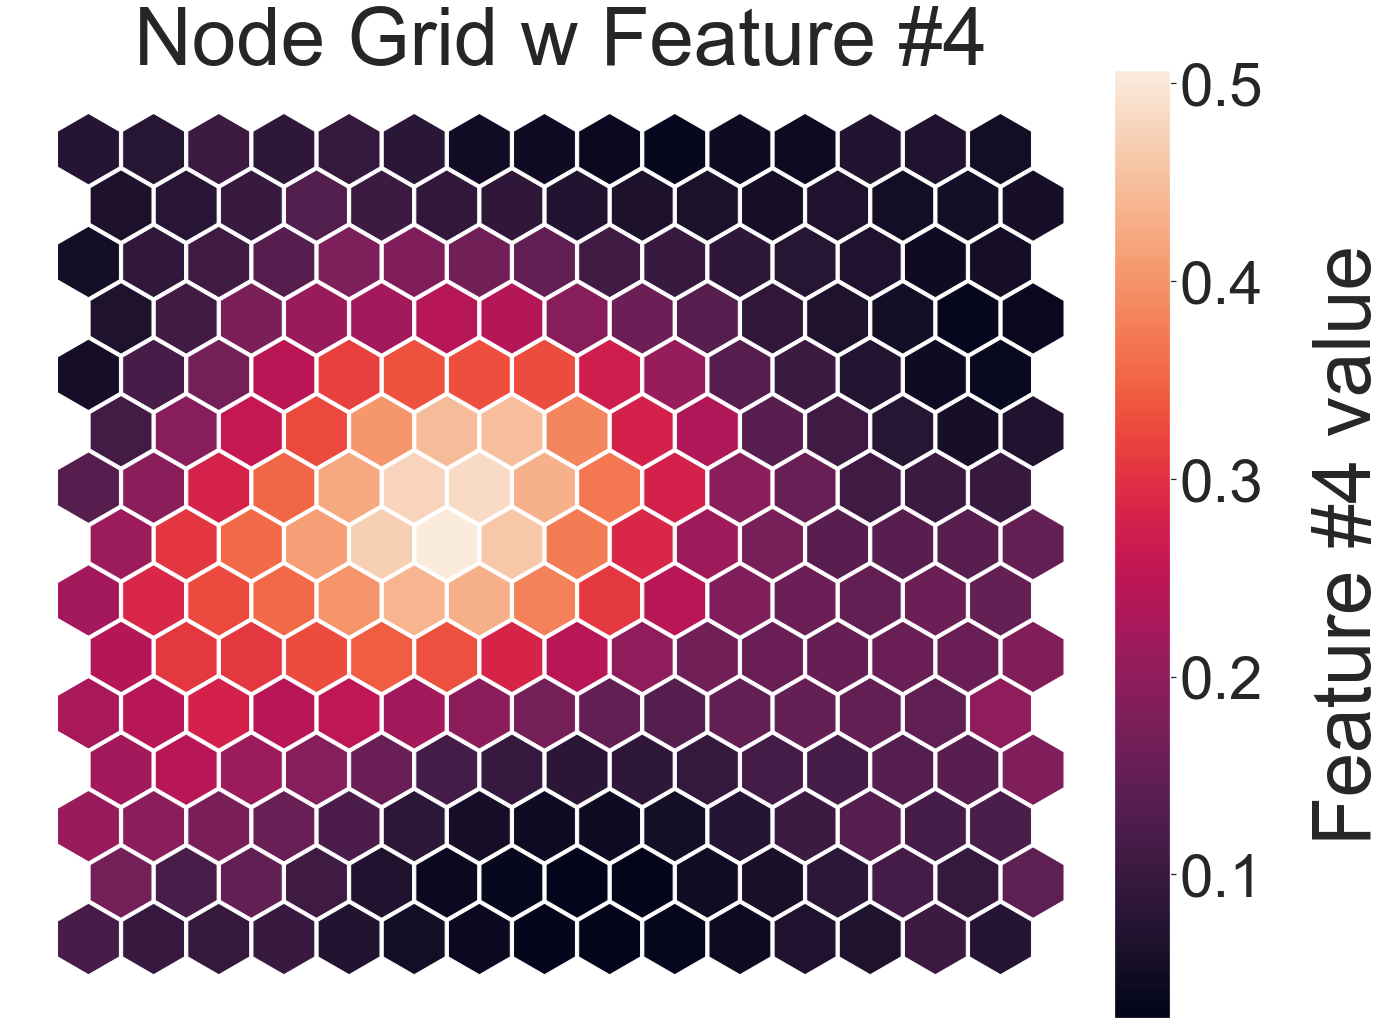

In [31]:
net.nodes_graph(colnum=4)

Для принятия решения о количестве кластеров построим карту удельности весов.

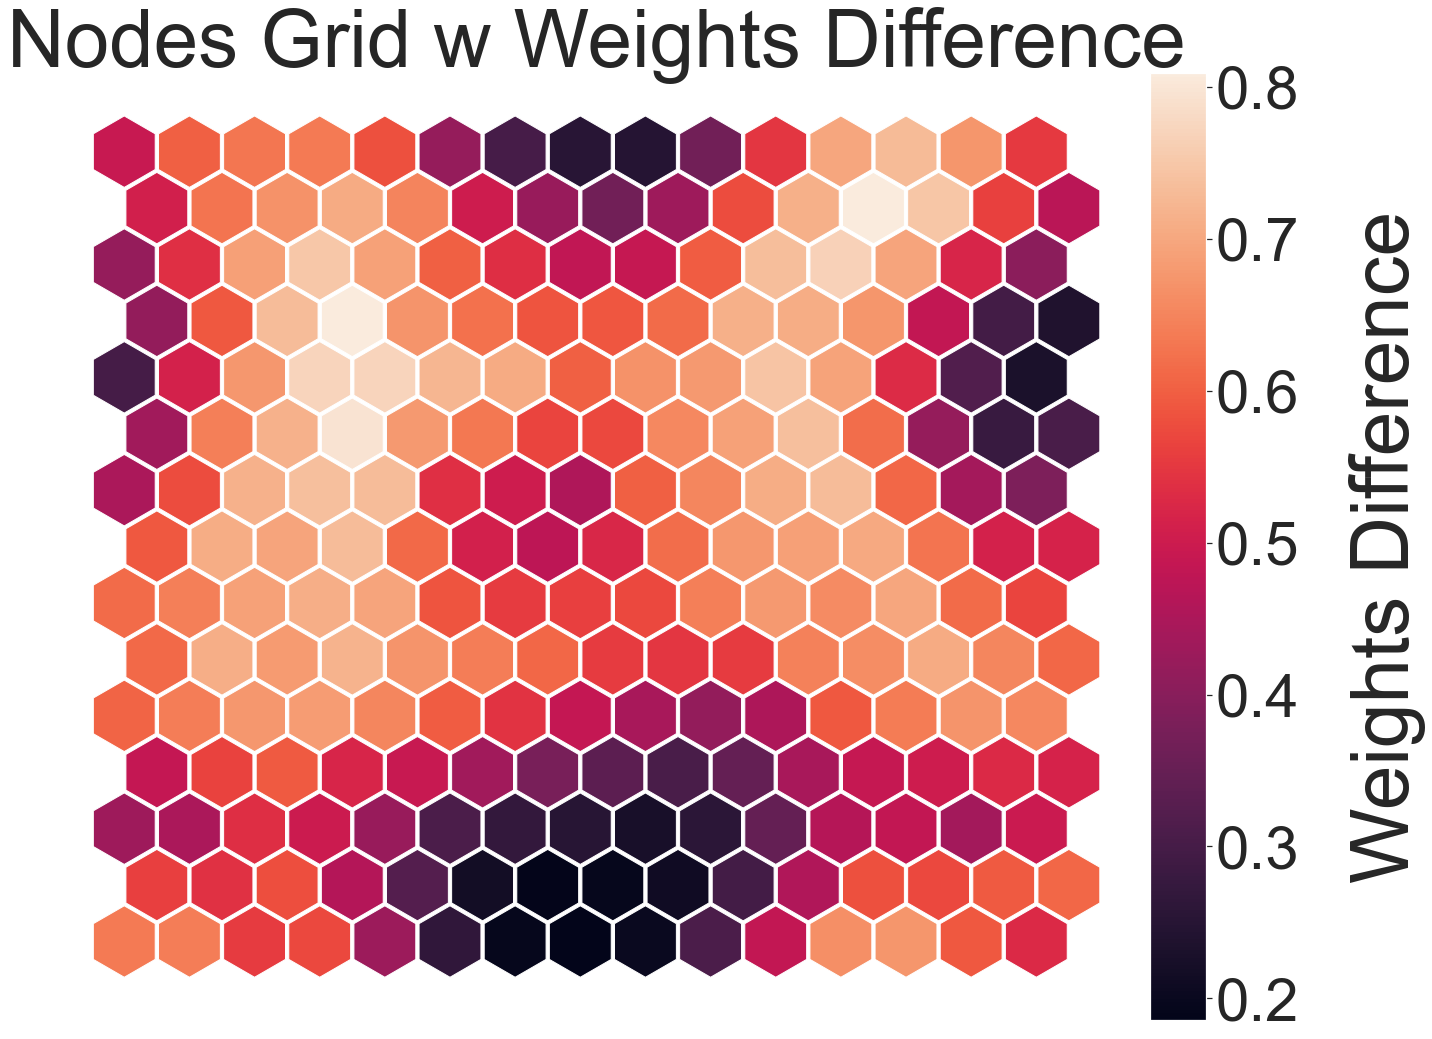

In [34]:
net.diff_graph()

Изобразим узлы карты, где можно условно выделить кластеры

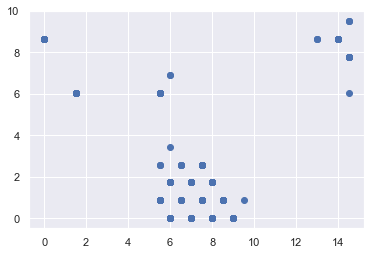

In [35]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

Применим к карте алгоритм к-средних. По карте можно выделить четыре кластера. Обучим нашу карту.

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(prj)

Сопоставим алгоритм К-средних с сетями Кохонена.

In [37]:
# Importing km clusters
import pickle
input = open('clust-kr.pkl', 'rb')
obj = pickle.load(input)
input.close()
km = obj["km"]

In [38]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km,kmeans.labels_)

0.8983972315980988

Как видим, результат совпадает на 89,8%. Это может говорить о том, что мы можем выделить четыре кластера.

- Итог: выполняя данную работу мы ознакомились с двумя методами разбиения на кластеры: метод К-средних и сети Кохонена. Изначально, используя метод к-средних, мы выделили 4 кластера, также мы оставили в нашей выборке 4 переменных для более простой интерпретации данных. Наши 4 кластера имели вид:
- 1. женщины с ALB, без AST и BIL оказались несклонными к болезни.
- 2. мужчины с ALB, без AST с BIL оказались несклонными к болезни.
- 3. мужчины без ALB, с AST и BIL оказались склонными к болезни.
- 4. женщины без ALB, с AST и BIL оказались склонными к болезни.
- Далее происходила работа с сетями Кохонена. Исходя из количества данных решено ставит размерную сетку 15Х15, т.к. в данном случае мы имеем точные результаты. 1500 итераций для обучения, также обоснованы малым количеством данных.
Когда мы обучили нейронную сеть по таким параметрам, то мы смогли выделить четыре кластера. При сревнеии с 4мя кластерами из метода к-средних мы получили совпадение на 89,8%, что говорит о верно принятом решении. Интерпретация по кластерам сопоставима в обоих методах, поэтому имеем право оставить четыре кластера.